In [1]:
!pwd # To check the current directory

/content


In [2]:
!wget http://www.aicitychallenge.org/wp-content/uploads/Shuo/2019/aic19-track2-reid.zip # Get data from web

--2019-06-04 04:41:15--  http://www.aicitychallenge.org/wp-content/uploads/Shuo/2019/aic19-track2-reid.zip
Resolving www.aicitychallenge.org (www.aicitychallenge.org)... 35.225.229.228
Connecting to www.aicitychallenge.org (www.aicitychallenge.org)|35.225.229.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736948326 (1.6G) [application/zip]
Saving to: ‘aic19-track2-reid.zip’

aic19-track2-reid.z 100%[===================>]   1.62G  22.7MB/s    in 74s     

2019-06-04 04:42:35 (22.3 MB/s) - ‘aic19-track2-reid.zip’ saved [1736948326/1736948326]



In [3]:
ls # check for files 

aic19-track2-reid.zip  sample_data/


In [4]:
!unzip /content/aic19-track2-reid.zip # Unzip file

Archive:  /content/aic19-track2-reid.zip
   creating: image_query/
  inflating: image_query/000590.jpg  
  inflating: image_query/000096.jpg  
  inflating: image_query/000664.jpg  
  inflating: image_query/001016.jpg  
  inflating: image_query/000821.jpg  
  inflating: image_query/001037.jpg  
  inflating: image_query/001014.jpg  
  inflating: image_query/000543.jpg  
  inflating: image_query/000448.jpg  
  inflating: image_query/000957.jpg  
  inflating: image_query/000796.jpg  
  inflating: image_query/000438.jpg  
  inflating: image_query/000962.jpg  
  inflating: image_query/000772.jpg  
  inflating: image_query/000294.jpg  
  inflating: image_query/000186.jpg  
  inflating: image_query/000265.jpg  
  inflating: image_query/000075.jpg  
  inflating: image_query/000795.jpg  
  inflating: image_query/000619.jpg  
  inflating: image_query/000661.jpg  
  inflating: image_query/000740.jpg  
  inflating: image_query/001007.jpg  
  inflating: image_query/000378.jpg  
  inflating: image_qu

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time

In [0]:
%matplotlib inline

In [0]:
PATH = "/content/image_train" # Setting PATH to image train


Viewing images using matplotlib 

In [0]:
import matplotlib.pyplot as plt


def show_images_with_labels(images, PATH):
 for i, image in enumerate(images):
   fig, ax = plt.subplots(1, 1, figsize=(7, 15))
   img = plt.imread(str(PATH/'image_train'/image))
   ax.imshow(img)
   plt.grid(False)
   plt.show()

In [0]:
import random
import os

In [0]:
rnd_file = []
for i in range(5) :
  rnd_file.append(random.choice(os.listdir('/content/image_train/')))

In [0]:
from pathlib import Path
path = Path('/content')

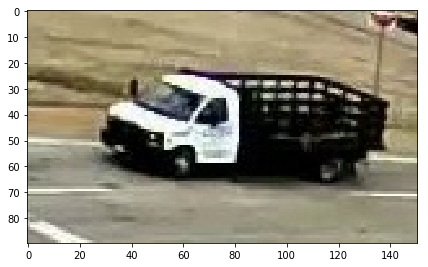

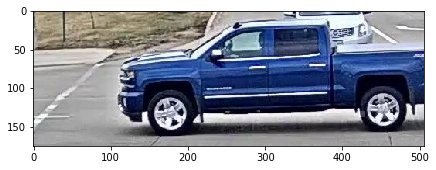

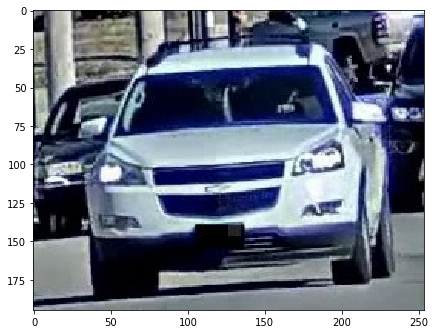

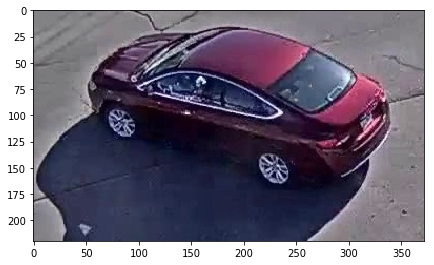

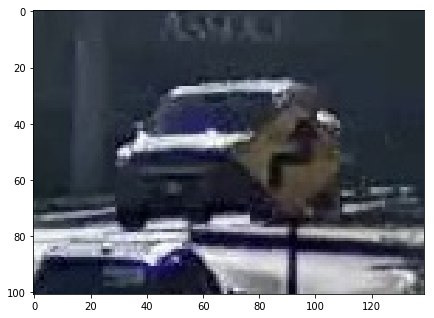

In [13]:
show_images_with_labels(rnd_file, path)

In [14]:
!cat /content/ReadMe.txt # To check all the content in the file.

%******************************************************************************************************************%
% The AIC19 benchmark is captured by 40 cameras in real-world traffic surveillance environment.                    %
% A total of 666 vehicles are annotated. 333 vehicles are used for training. The remaining 333 vehicles are for    %
% testing.                                                                                                         %
% There are 56277 images in total. 18290 images are in the test set, and 36935 images are in the training set.     %
%******************************************************************************************************************%

Content in the directory:
1. "image_query/". This dir contains 1052 images as queries. 
2. "image_test/". This dir contains 18290 images for testing. 
3. "image_train/". This dir contains 36935 images for training. 
4. "name_query.txt". It lists all query file names.
5. "name_test.txt". It lists 

In [0]:
# Convert train label into a dataframe 

In [0]:
train_label = !cat /content/train_label.csv

In [0]:
import pandas as pd 

In [0]:
train_label = pd.read_csv("/content/train_label.csv",header=None) 

In [0]:
train_label.columns = ['class','file_name'] # assigning column names to dataframe.

In [0]:
cols = train_label.columns.tolist()

In [0]:
cols = cols[-1:] + cols[:-1]

In [22]:
cols

['file_name', 'class']

In [0]:
train_label = train_label[cols] 

In [24]:
train_label.head()

file_name  class
0  000001.jpg    418
1  000002.jpg    381
2  000003.jpg    358
3  000004.jpg    353
4  000005.jpg     56

In [0]:
train_label.to_csv("annots.csv", index = False)

In [0]:
import numpy as np

In [0]:
# train_label_grouping = train_label.groupby(["label"])["image_id"].count().reset_index(name="count")

In [0]:

# train_label_grouping.sort_values('count',ascending=False) # below is the frequency count on the number of images under each group.

In [0]:
# Convert train_track_txt into dataframe # Unable to download need to import data with some cleaning.

In [0]:
# train_track = !cat /content/train_track.txt

In [0]:
# train_track_csv = pd.read_csv('train_track.txt', sep=" ", header=None)

In [0]:
# name_train.txt into dataframe

In [0]:
# name_train = !cat /content/name_train.txt

In [0]:
# name_train = pd.read_csv('name_train.txt', sep=" ", header=None,names=["names"])

In [0]:
# name_train.count()

In [0]:
# name_train.head()

In [0]:
# Get images and image names together using Fast.AI

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import fast AI libraries

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
#path_img = !cat /content/image_train



In [0]:
path_img =  "/content/image_train/"

Use get_transforms from fast.ai library

In [0]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                     xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

In [0]:
# batch size
bs = 64

In [0]:
src = (ImageList.from_csv(path,'annots.csv', folder = 'image_train') #define source of input
      .split_by_rand_pct(0.2)       #ratio of split
      .label_from_df())

In [0]:
data = (src.transform(tfms, size=224)  #resize images to 224
       .databunch(bs=bs)              #batch size=64
       .normalize(imagenet_stats))    #normalize data using imagenet mean, std

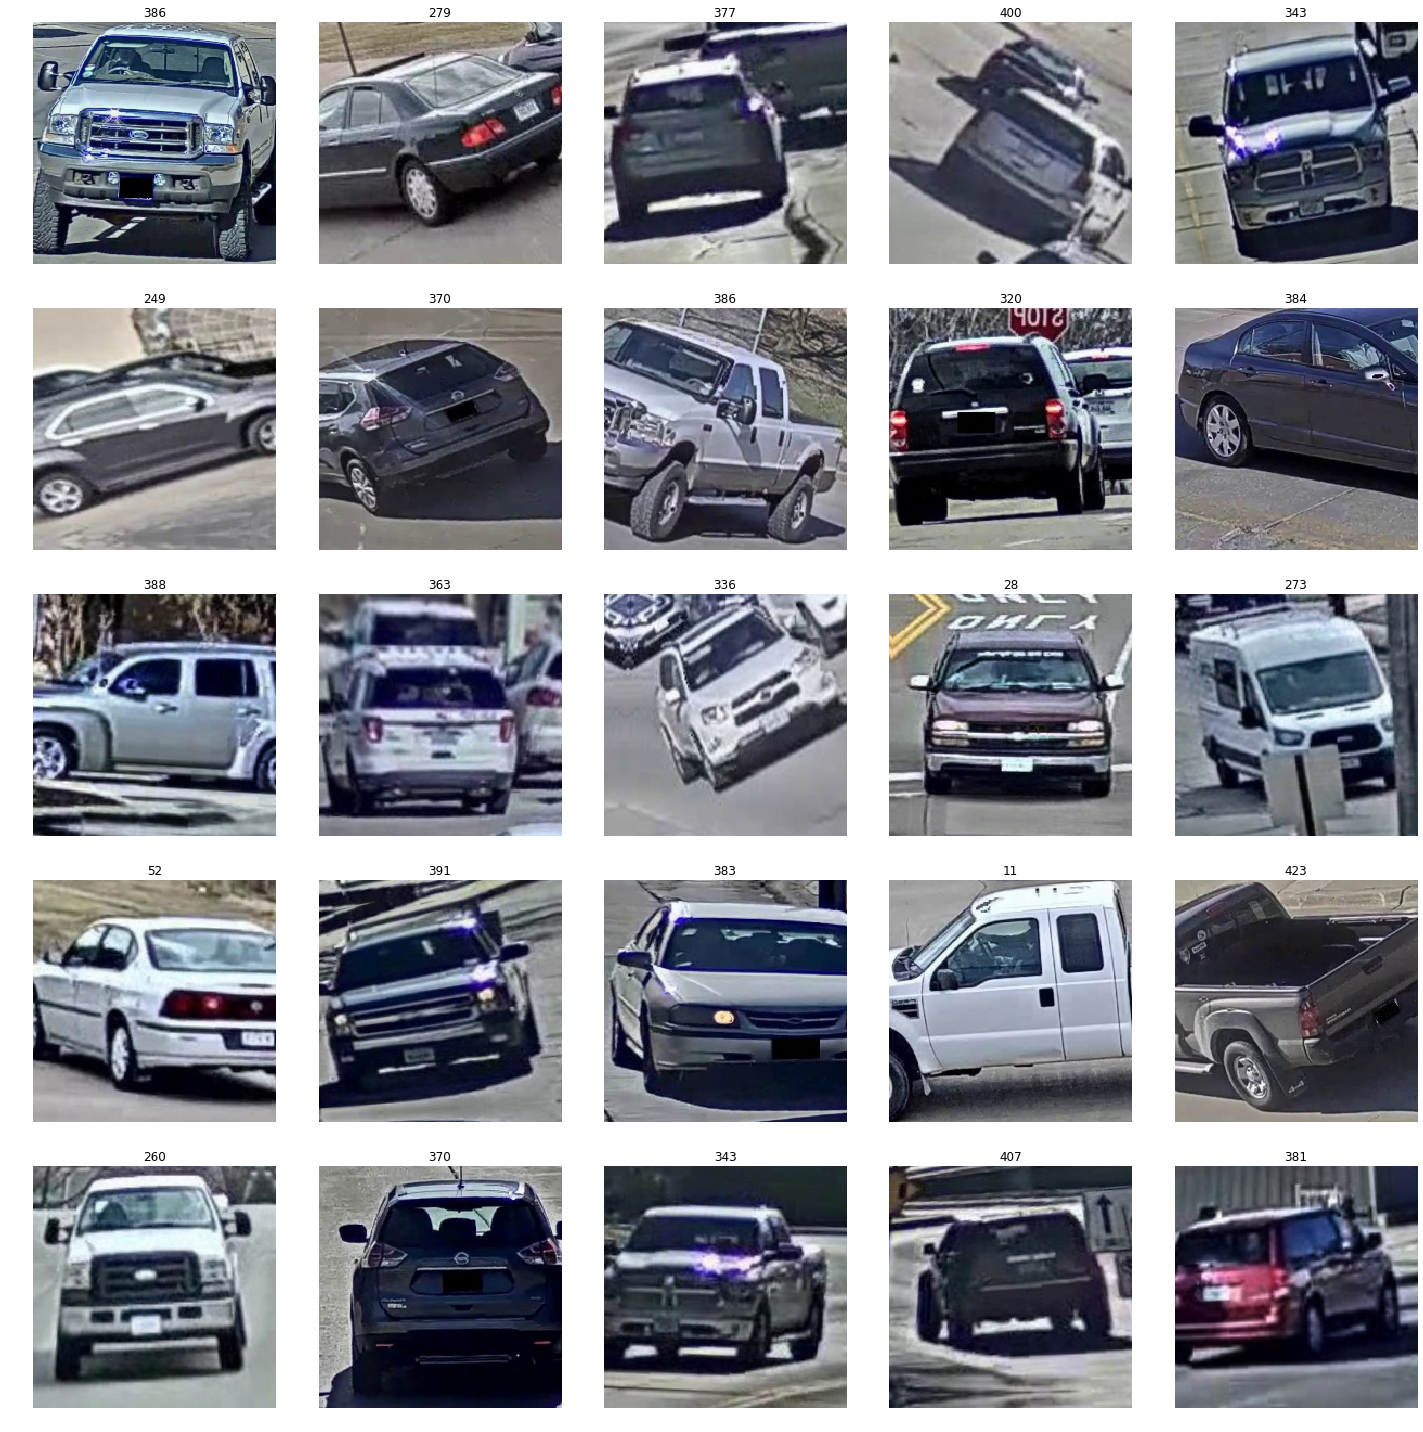

In [0]:
data.show_batch()

In [35]:
len(data.classes) # Total number of classes

333

In [0]:
?cnn_learner

In [38]:
learn = cnn_learner(data, models.resnet50, pretrained=True, metrics=[error_rate, accuracy, top_k_accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 28296869.72it/s]


In [39]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


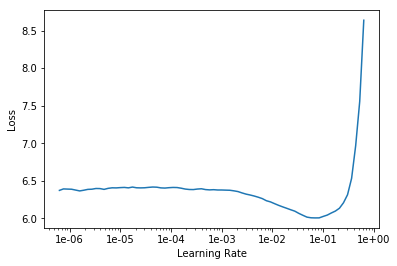

In [0]:
learn.recorder.plot()


In [0]:
?learn.fit_one_cycle

In [0]:
lr = 1e-2 
learn.fit_one_cycle(5, slice(lr))

In [0]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


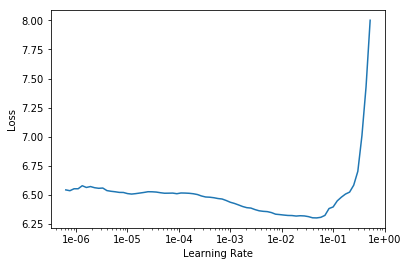

In [42]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(4, slice(1e-5, lr/5))


NameError: ignored

In [0]:
learn.save('/content/nvidia_ai_model_1_224_stage-2')


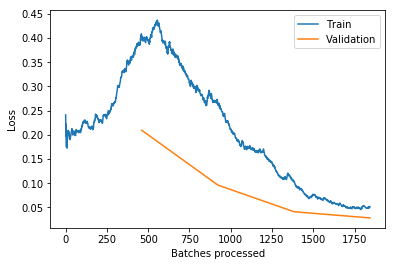

In [0]:
learn.recorder.plot_losses()

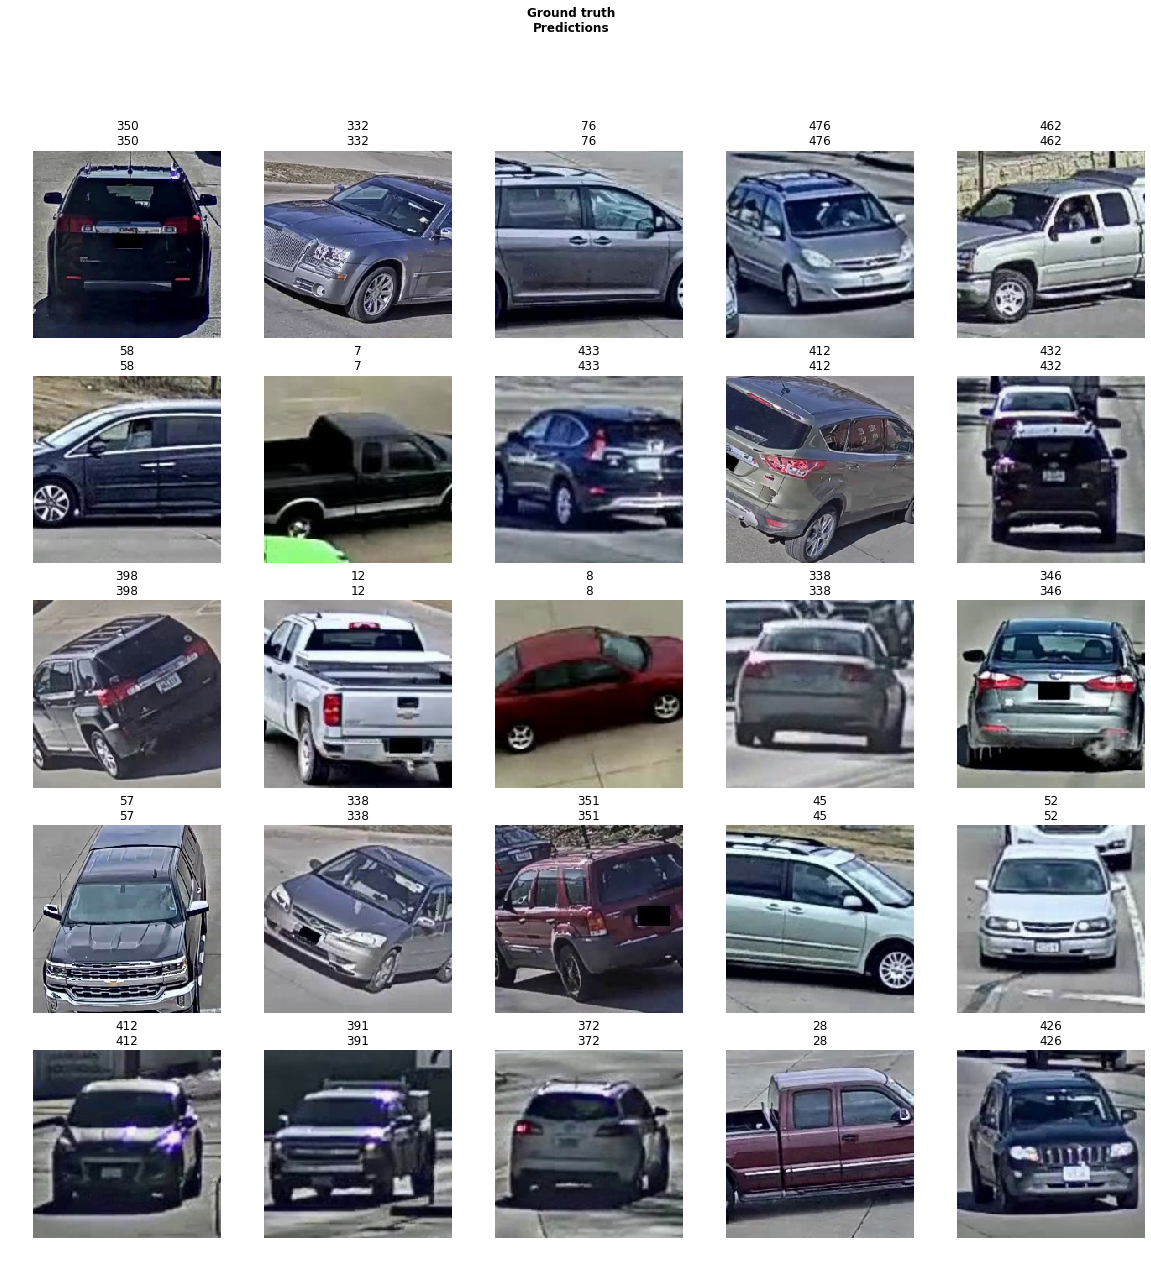

In [0]:
learn.show_results(rows=5)


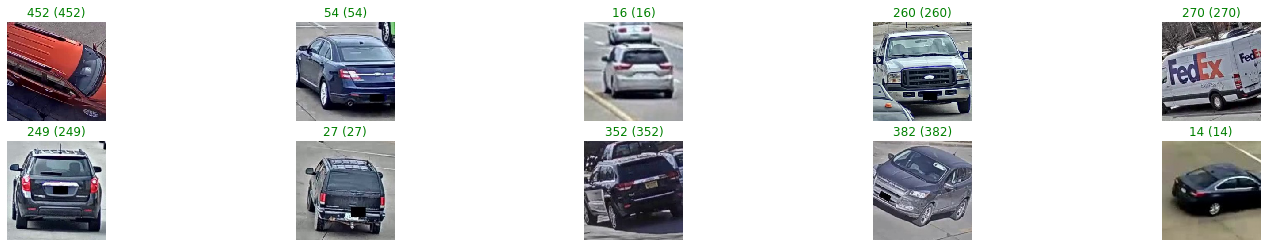

In [0]:
# classes
labels = learn.data.classes

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    img = data.valid_ds[idx+np.random.randint(0, len(data.valid_ds)-10)][0]
    preds = learn.predict(img)
    img.show(ax=ax)
    ax.set_title("{} ({})".format(str(learn.data.classes[preds[1]]), str(preds[0])),
                 color=("green" if str(learn.data.classes[preds[1]])==str(preds[0]) else "red"))

In [0]:
# Pretrained model on stanford car dataset

In [0]:
import torch

#load pretrained model
# pre_trained_model = torch.load("pretrained_resnet.pth")